In [20]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [21]:
credit=pd.read_csv("german_credit.csv")
credit.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [22]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [23]:
credit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [24]:
credit.shape

(1000, 21)

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [25]:
credit1=credit.sample(n=500)

In [26]:
credit1.shape

(500, 21)

In [27]:
credit1.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
939,0,no checking account,24,critical account/ other credits existing (not ...,car (used),6842,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,if not A121 : building society savings agreeme...,46,none,own,2,management/ self-employed/ highly qualified em...,2,"yes, registered under the customers name",yes
402,1,no checking account,24,delay in paying off in the past,business,8648,... < 100 DM,... < 1 year,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",27,bank,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
590,0,< 0 DM,12,critical account/ other credits existing (not ...,domestic appliances,385,... < 100 DM,4 <= ... < 7 years,4,female : divorced/separated/married,...,3,real estate,58,none,own,4,unskilled - resident,1,"yes, registered under the customers name",yes
598,1,no checking account,18,critical account/ other credits existing (not ...,car (new),2775,... < 100 DM,4 <= ... < 7 years,2,male : single,...,2,if not A121 : building society savings agreeme...,31,bank,own,2,skilled employee / official,1,none,yes
606,0,no checking account,24,critical account/ other credits existing (not ...,business,4526,... < 100 DM,1 <= ... < 4 years,3,male : single,...,2,real estate,74,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [28]:
credit1=pd.get_dummies(credit1,drop_first=True)

In [29]:
credit1.shape

(500, 49)

In [30]:
credit1.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
939,0,24,6842,2,4,46,2,2,0,0,...,0,1,0,1,0,0,0,0,1,1
402,1,24,8648,2,2,27,2,1,0,0,...,0,0,0,1,0,1,0,0,1,1
590,0,12,385,4,3,58,4,1,1,0,...,0,1,0,1,0,0,0,1,1,1
598,1,18,2775,2,2,31,2,1,0,0,...,0,0,0,1,0,1,0,0,0,1
606,0,24,4526,3,2,74,1,1,0,0,...,0,1,0,1,0,0,0,0,1,1


In [0]:
# Print Shape of model data

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [34]:
credit1.corr()['default'][:]

default                                                                       1.000000
duration_in_month                                                             0.189623
credit_amount                                                                 0.158844
installment_as_income_perc                                                    0.051792
present_res_since                                                             0.005716
age                                                                          -0.050612
credits_this_bank                                                            -0.038516
people_under_maintenance                                                     -0.014538
account_check_status_< 0 DM                                                   0.291050
account_check_status_>= 200 DM / salary assignments for at least 1 year      -0.071246
account_check_status_no checking account                                     -0.381137
credit_history_critical account/ other cred

### Drop the original variables which are converted to dummy

### Since get_dummies is used previously itself with drop_first=true, all the original variables are converted into dummy new variables.. so there is no need to drop them now.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [39]:
X=credit1.drop('default',axis=1)
y=credit1['default']
print("X Shape:",X.shape)
print("Y Shape:",y.shape)

X Shape: (500, 48)
Y Shape: (500,)


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.30, random_state=7)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators = 500,criterion="entropy",random_state=9999)

In [42]:
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [43]:
y_pred=rfcl.predict(X_test)

In [59]:
y_pred1=rfcl.predict(X_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [60]:
from sklearn import metrics
print("Train Accuracy Score:",rfcl.score(X_train,y_train))
print("Test Accuracy Score:",rfcl.score(X_test,y_test))
print("Train Confusion Matrix:","\n",metrics.confusion_matrix(y_train,y_pred1))
print("Test Confusion Matrix:","\n",metrics.confusion_matrix(y_test,y_pred))

Train Accuracy Score: 1.0
Test Accuracy Score: 0.76
Train Confusion Matrix: 
 [[231   0]
 [  0 119]]
Test Confusion Matrix: 
 [[91 15]
 [21 23]]


### Q6 Show the list of the features importance( 1 Marks)

In [46]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                                         Imp
duration_in_month                                   0.081816
credit_amount                                       0.102354
installment_as_income_perc                          0.038169
present_res_since                                   0.035109
age                                                 0.078816
credits_this_bank                                   0.021156
people_under_maintenance                            0.012980
account_check_status_< 0 DM                         0.035498
account_check_status_>= 200 DM / salary assignm...  0.009762
account_check_status_no checking account            0.089996
credit_history_critical account/ other credits ...  0.024150
credit_history_delay in paying off in the past      0.009672
credit_history_existing credits paid back duly ...  0.018960
credit_history_no credits taken/ all credits pa...  0.014221
purpose_business                                    0.008701
purpose_car (new)       

# K-fold cross validation is done on 50% data taken from the original data in which random forest model is also done. Throughout the lab assignment only 50 % data is used for analysis 

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [48]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [52]:
kf=KFold(n_splits=num_folds,random_state=seed)
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rfcl, X,y, cv=kf)
cv_score

array([0.8 , 0.72, 0.86, 0.84, 0.68, 0.66, 0.7 , 0.74, 0.76, 0.74])

In [0]:
#Calculate Mean score

In [53]:
print("Mean score is:",cv_score.mean())

Mean score is: 0.75


In [0]:
# Calculate score standard deviation using std()

In [54]:
print("Standard Deviation is:",cv_score.std())

Standard Deviation is: 0.06276941930590087


# Q8 Print the confusion matrix( 1 Marks)

In [57]:
from sklearn.model_selection import cross_val_predict
cv_pred=cross_val_predict(rfcl,X,y,cv=kf)

In [58]:
metrics.confusion_matrix(y,cv_pred)

array([[303,  34],
       [ 91,  72]], dtype=int64)

In [86]:
y.sum()

163

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score
print("Accuracy Score:",accuracy_score(y,cv_pred))
print("Recall Score:",recall_score(y,cv_pred))
print("Precision Score:",precision_score(y,cv_pred))
print("F1 Score:",f1_score(y,cv_pred))

Accuracy Score: 0.75
Recall Score: 0.44171779141104295
Precision Score: 0.6792452830188679
F1 Score: 0.5353159851301115


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

# ROC CURVE FOR TRAIN SET

In [63]:
from sklearn.metrics import roc_curve, auc
y_predictProb = rfcl.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9999999999999999

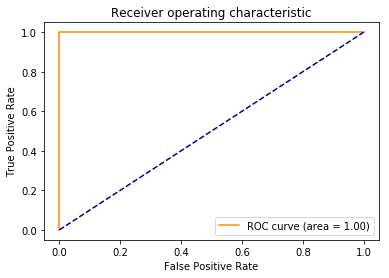

In [64]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# ROC CURVE FOR TEST SET


In [67]:
from sklearn.metrics import roc_curve, auc
y_predictProb1 = rfcl.predict_proba(X_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_predictProb1[::,1])
roc_auc1 = auc(fpr1, tpr1)
roc_auc1

0.773048885077187

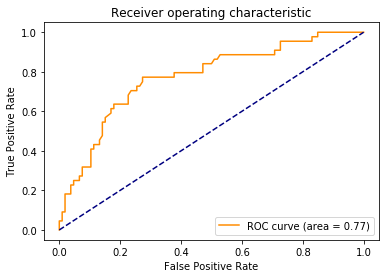

In [68]:
plt.plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [78]:
roc_auc = auc(fpr, tpr)
print("AUC for train data: ",roc_auc)

AUC for train data:  0.9999999999999999


In [79]:
roc_auc1 = auc(fpr1, tpr1)
print("AUC for test data: ",roc_auc1)

AUC for test data:  0.773048885077187


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [80]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [83]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [85]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Average: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Average:  0.744
Standard deviation:  0.02026491220476088
